# Índice

1.  Carregar dados e bibliotecas
1.  Limpeza dos Dados
    1. Visão Geral
    1. Colunas Vazias
    1. Tipos de dados
1.  Análise Exploratória
    1. Visão Geral

**Análise Exploratória**

A base disponível possui muitas interações manuais. Avalie a qualidade dos dados antes de efetivamente explorar;
Crie novos atributos para conseguir explorar melhor os dados disponíveis;
Explore os dados, criando ao menos 5 visualizações distintas, garantindo qua cada uma delas possua títulos e descritivos para os eixos, além de uma discussão apropriada do objetivo e conclusões para cada visualização;
Explore os dados utilizando análises estatísticas.

**Machine Learning**

Crie um modelo capaz de prever o percentual de cumprimento da meta ao fim do ano para um determinado funcionário. Descreva cada detalhe considerado para o modelo, como qual foia estratégia de separação entre teste e validação e métricas de performance.

In [1]:
!echo y | pip install missingno

## 1. Carregar dados e bibliotecas

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno
import seaborn as sns

In [3]:
nome_colunas = [
   'mes', 'pais', 'mundo', 'area_regional', 'unidade',
   'grupo_cargo', 'cargo', 'grade', 'banda', 'area', 'id_funcionario',
   'id_gestor', 'id_kpi', 'diretoria', 'area_diretoria',
   'funcao', 'tipo_meta', 'categoria_kpi', 'nome_kpi', 'peso_kpi',
   'prazo', 'regra_alcance_parcial', 'meta_projeto', 'pct_ating_mes',
   'pct_pts_mes', 'pct_acum_mes', 'pct_ating_acum', 'pct_pts_acumulado',
   'pct_acum_acumulado', 'pct_ating_fim_exer', 'pct_pts_fim_exer',
   'pct_acum_fim_exer', 'status_meta', 'c33', 'c34', 'c35', 'c36', 'c37']
data = pd.read_csv('../data/raw/ambev-final-dataset.csv', encoding='utf-8')

/home/andre/anaconda3/envs/ambev_data_challenge/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3018: DtypeWarning: Columns (5,12,13,14,15,20,23,24,25,26,27,32,33,37) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
data.columns

Index(['Mês Referência', 'País', 'Mundo', 'Regional/Área', 'Unidade',
       'Grupo Cargo', 'Cargo', 'Grade', 'Banda', 'Área', 'Nome FuncionÁ¡rio',
       'Nome Gestor', 'Código KPI', 'Diretoria', 'Áreas da Diretoria',
       'Função', 'Tipo da Meta', 'Categoria KPI', 'Nome KPI', 'Peso KPI',
       'Prazo', 'Regra Alcance Parcial', 'Meta Projeto', '% Ating Mês',
       '% Pontos Mês', '% Acum Mês', '% Ating Acumulado', '% Pontos Acumulado',
       '% Acum Acumulado', '% Ating Fim Exer', '% Pontos Fim Exer',
       '% Acum Fim Exer', 'Status Meta', 'Unnamed: 33', 'Unnamed: 34',
       'Unnamed: 35', 'Unnamed: 36', 'Unnamed: 37'],
      dtype='object')

In [5]:
data.columns = nome_colunas

In [6]:
data.head()

,mes,pais,mundo,area_regional,unidade,grupo_cargo,cargo,grade,banda,area,...,pct_acum_acumulado,pct_ating_fim_exer,pct_pts_fim_exer,pct_acum_fim_exer,status_meta,c33,c34,c35,c36,c37
0,32017,Brasil,Sales,10,78,GER DE VENDAS REVENDA,GERENTE DE VENDAS REVENDA II,12.0,VI-B,GERÊNCIA CD,...,0.0,100.0,100.0,25.0,Monitoramento Aprovado,NaN,NaN,NaN,NaN,NaN
1,32017,Brasil,Sales,10,78,GER DE VENDAS REVENDA,GERENTE DE VENDAS REVENDA II,12.0,VI-B,GERÊNCIA CD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,32017,Brasil,Sales,10,78,GER DE VENDAS REVENDA,GERENTE DE VENDAS REVENDA II,12.0,VI-B,GERÊNCIA CD,...,12.0,100.0,100.0,20.0,Monitoramento Aprovado,NaN,NaN,NaN,NaN,NaN
3,32017,Brasil,Sales,10,78,GER DE VENDAS REVENDA,GERENTE DE VENDAS REVENDA II,12.0,VI-B,GERÊNCIA CD,...,12.0,100.0,100.0,15.0,Monitoramento Aprovado,NaN,NaN,NaN,NaN,NaN
4,32017,Brasil,Sales,10,78,GER DE VENDAS REVENDA,GERENTE DE VENDAS REVENDA II,12.0,VI-B,GERÊNCIA CD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
data.shape

(270633, 38)

## 2. Limpeza de Dados

### 2.1 Visão Geral

In [8]:
data.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
mes,270633,NaN,NaN,NaN,80149.4,28171.7,32017,62017,82017,102017,122017
pais,270633,9,Brasil,230229,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mundo,270501,30,Supply,108891,NaN,NaN,NaN,NaN,NaN,NaN,NaN
area_regional,270633,NaN,NaN,NaN,10.9267,6.96919,0,4,11,19,22
unidade,270633,NaN,NaN,NaN,181.461,100.705,0,94,221,264,331
grupo_cargo,230099,140,SUPERVISOR FABRIL,45482,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cargo,262118,339,ANALISTA I,18658,NaN,NaN,NaN,NaN,NaN,NaN,NaN
grade,262118,NaN,NaN,NaN,10.5857,1.96224,1,9,10,12,17
banda,262118,23,VII-B,41953,NaN,NaN,NaN,NaN,NaN,NaN,NaN
area,262116,113,PACKAGING,24771,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Text(0.5, 1.0, 'Percentual de dados não faltantes')

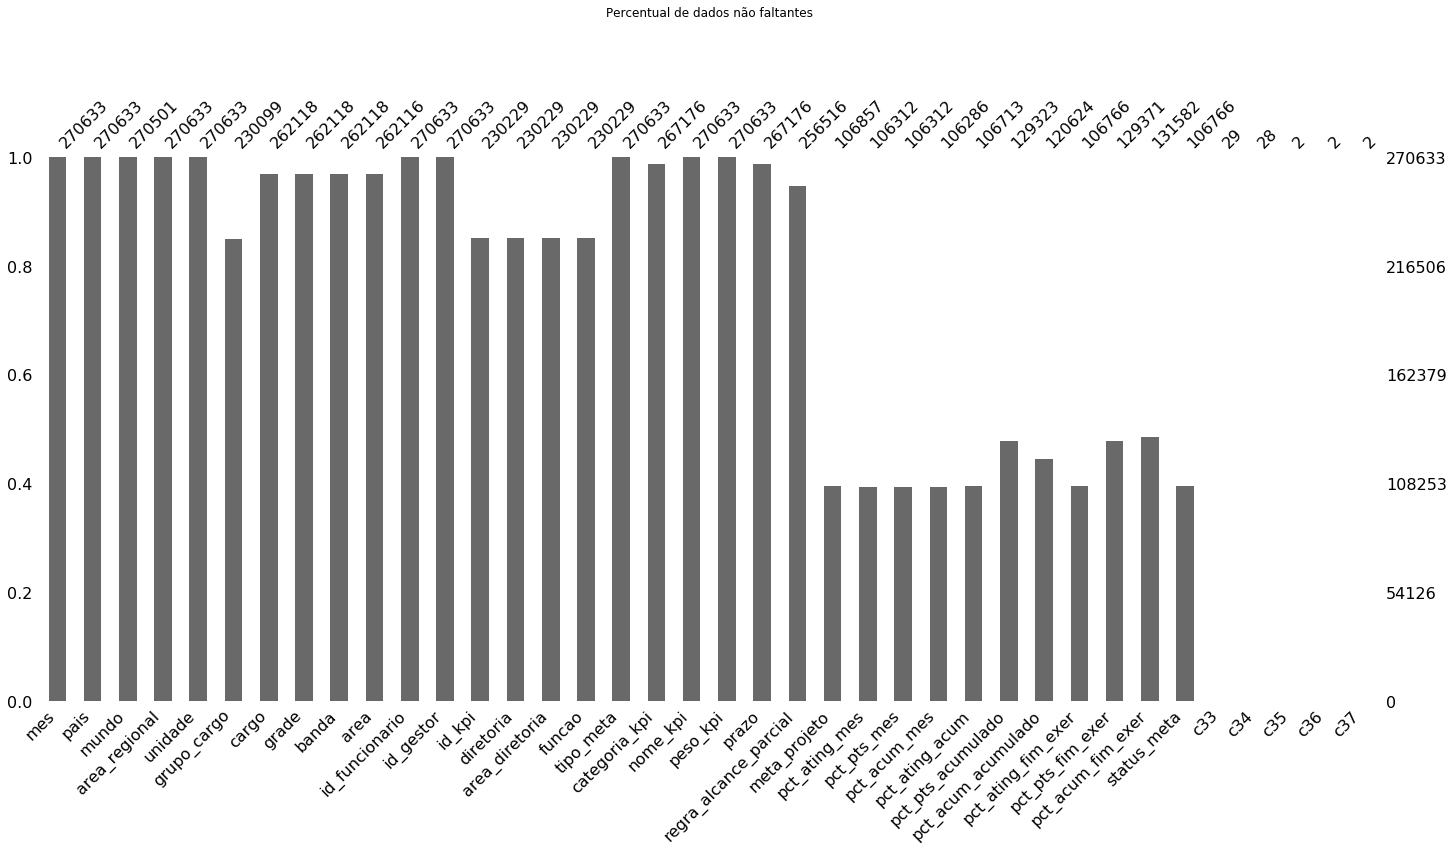

In [9]:
g = missingno.bar(data)
g.set_title('Percentual de dados não faltantes', pad=80)

In [10]:
data[~data['c33'].isna()].head()

,mes,pais,mundo,area_regional,unidade,grupo_cargo,cargo,grade,banda,area,...,pct_acum_acumulado,pct_ating_fim_exer,pct_pts_fim_exer,pct_acum_fim_exer,status_meta,c33,c34,c35,c36,c37
9610,32017,Brasil,CE,1,275,ESPECIALISTA,ESPECIALISTA IV,15.0,V-A,MARKETING,...,100.0,100.0,20.0,100.0,100,20,100.0,100.0,20.0,Monitoramento Aprovado
31343,42017,Brasil,CE,1,275,ESPECIALISTA,ESPECIALISTA IV,15.0,V-A,MARKETING,...,100.0,100.0,20.0,100.0,100,20,100.0,100.0,20.0,Monitoramento Aprovado
80305,62017,Brasil,CE,1,275,ESPECIALISTA,ESPECIALISTA IV,15.0,V-A,MARKETING,...,100.0,20.0,100.0,100.0,20,Monitoramento Aprovado,NaN,NaN,NaN,NaN
231383,62017,PanamÁ¡,Finance,4,258,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,100.0,40.0,NaN,100,40.0,NaN,NaN,NaN
231385,62017,PanamÁ¡,Finance,4,258,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,100.0,30.0,NaN,100,30.0,NaN,NaN,NaN


#### Notas e Observações

* Observa-se que há um problema na coluna **Regra Alcance Parcial**, pois em alguns casos seu texto se divide em outras colunas, causando a criação de **colunas a mais não alinhadas****** com o resto da base.

=============================================================

### 2.2 Concertando Colunas

Como foi observado, a coluna  **Regra Alcance Parcial** em algumas linhas está quebrada, gerando colunas a mais e quebrando a ordem da colunas. Para alinhar as colunas sem ter que deletar as linhas com problema cada linha será tratada de forma a se obter o texto inteiro da coluna  **Regra Alcance Parcial** e alinhar as outras colunas. Por fim as  serão removidas as colunas extras.

In [11]:
# distribuição antes de Meta Projeto 
data.meta_projeto.value_counts()

Não                                                                   101892
Sim                                                                     4818
05% hs paradas: 80% dos pontos                                            65
 available at SDCA+"                                                      34
 Self-assesment                                                           26
 Control and Gobernance) is achived"                                       8
 control and government) is received"                                      7
 control and goverment) is achieved."                                      4
5% goal                                                                    2
 validated with VP and implemented in the market = 60% of points""         1
Name: meta_projeto, dtype: int64

In [12]:
data['UltNAN'] = np.nan # coluna de nan para usar na limpeza
colunas_problema = nome_colunas[21:]

In [110]:
colunas_problema

['regra_alcance_parcial',
 'meta_projeto',
 'pct_ating_mes',
 'pct_pts_mes',
 'pct_acum_mes',
 'pct_ating_acum',
 'pct_pts_acumulado',
 'pct_acum_acumulado',
 'pct_ating_fim_exer',
 'pct_pts_fim_exer',
 'pct_acum_fim_exer',
 'status_meta',
 'c33',
 'c34',
 'c35',
 'c36',
 'c37']

In [13]:
# indices com problemas nas colunas
ids_ruins = data[~data.meta_projeto.isin(['Não', 'Sim', pd.np.nan]) & ~(data.loc[:,'pct_ating_mes':].notna().sum(axis=1) == 0)].index
# se livrando dos zeros
data.loc[data.regra_alcance_parcial.str.len() < 2, 'regra_alcance_parcial'] = np.NAN 
data.loc[ids_ruins,:].shape

(82, 39)

In [14]:
nome_colunas = [
   'mes', 'pais', 'mundo', 'area_regional', 'unidade',
   'grupo_cargo', 'cargo', 'grade', 'banda', 'area', 'id_funcionario',
   'id_gestor', 'id_kpi', 'diretoria', 'area_diretoria',
   'funcao', 'tipo_meta', 'categoria_kpi', 'nome_kpi', 'peso_kpi',
   'prazo', 'regra_alcance_parcial', 'meta_projeto', 'pct_ating_mes',
   'pct_pts_mes', 'pct_acum_mes', 'pct_ating_acum', 'pct_pts_acumulado',
   'pct_acum_acumulado', 'pct_ating_fim_exer', 'pct_pts_fim_exer',
   'pct_acum_fim_exer', 'status_meta', 'c33', 'c34', 'c35', 'c36', 'c37']

In [15]:
# concertando colunas
for i in range(6):
    idxs = data[~data.meta_projeto.isin(['Sim', 'Não', np.nan, np.NAN])].index
    data.loc[idxs, 'regra_alcance_parcial'] = data.loc[idxs, 'regra_alcance_parcial'].fillna('').astype(str) + ' ' +  data.loc[idxs, 'meta_projeto'].fillna('').astype(str)
    for i in range(1, len(colunas_problema) - 1):
        data.loc[idxs, colunas_problema[i]] = data.loc[idxs, colunas_problema[i+1]].values

In [16]:
# removendo colunas
data.drop([ 'c33', 'c34', 'c35', 'c36', 'c37', 'UltNAN'], axis=1, inplace=True)

In [17]:
# distribuição de Meta Projeto depois da limpeza das colunas
data.meta_projeto.value_counts()

Não    101895
Sim      4818
Name: meta_projeto, dtype: int64

### 2.3 Tipos dos dados

Agora com as colunas concertadas, vamos tentar ajeitar os tipos de dados de cada coluna.

In [18]:
for col in data.columns:
    cnum = data.columns.get_loc(col)
    dtype = data[col].dtype
    nuniques = data[col].nunique()
    examples = data[col].unique()[:3]
    print('======\ncoluna {}\ncnum {}\tdtype {}\tnunique {}\texamples {}'.format(col, cnum, dtype, nuniques, examples))

coluna mes
cnum 0	dtype int64	nunique 10	examples [32017 42017 52017]
coluna pais
cnum 1	dtype object	nunique 9	examples ['Brasil' 'Barbados' 'Cuba']
coluna mundo
cnum 2	dtype object	nunique 30	examples ['Sales' 'Supply' 'CE']
coluna area_regional
cnum 3	dtype int64	nunique 23	examples [10 20  3]
coluna unidade
cnum 4	dtype int64	nunique 332	examples [78 14  5]
coluna grupo_cargo
cnum 5	dtype object	nunique 140	examples ['GER DE VENDAS REVENDA' 'SUPERVISOR FABRIL' 'ESPECIALISTA']
coluna cargo
cnum 6	dtype object	nunique 339	examples ['GERENTE DE VENDAS REVENDA II' 'SUPERVISOR SENIOR FABRIL'
 'ESPECIALISTA II']
coluna grade
cnum 7	dtype float64	nunique 17	examples [12. 11. 13.]
coluna banda
cnum 8	dtype object	nunique 23	examples ['VI-B' 'VI-C' 'VI-A']
coluna area
cnum 9	dtype object	nunique 113	examples ['GERÊNCIA CD' 'PRODUçãO' 'APF']
coluna id_funcionario
cnum 10	dtype int64	nunique 7858	examples [2774 7548 7052]
coluna id_gestor
cnum 11	dtype int64	nunique 2005	examples [ 237 1983  

In [19]:
data.columns

Index(['mes', 'pais', 'mundo', 'area_regional', 'unidade', 'grupo_cargo',
       'cargo', 'grade', 'banda', 'area', 'id_funcionario', 'id_gestor',
       'id_kpi', 'diretoria', 'area_diretoria', 'funcao', 'tipo_meta',
       'categoria_kpi', 'nome_kpi', 'peso_kpi', 'prazo',
       'regra_alcance_parcial', 'meta_projeto', 'pct_ating_mes', 'pct_pts_mes',
       'pct_acum_mes', 'pct_ating_acum', 'pct_pts_acumulado',
       'pct_acum_acumulado', 'pct_ating_fim_exer', 'pct_pts_fim_exer',
       'pct_acum_fim_exer', 'status_meta'],
      dtype='object')

In [20]:
data.groupby('id_funcionario')

### Fix: Mês

In [21]:
data.mes.value_counts()

122017    30713
112017    30504
102017    29226
82017     28620
62017     28361
92017     28271
72017     27625
42017     23456
52017     22913
32017     20944
Name: mes, dtype: int64

In [22]:
data['mes'] = data.mes.astype(str).str.extract('(^.*)(?=.{4}$)').astype(int)

In [23]:
data.mes.value_counts()

12    30713
11    30504
10    29226
8     28620
6     28361
9     28271
7     27625
4     23456
5     22913
3     20944
Name: mes, dtype: int64

### Fix - cc

In [24]:
data.pais.value_counts()

Brasil             230229
Rep. Dominicana     24120
Panama               7090
Barbados             4131
Guatemala            2799
PanamÁ¡              1189
Saint Vincent         753
Dominica              262
Cuba                   60
Name: pais, dtype: int64

In [25]:
data.loc[data.pais == 'PanamÁ¡', 'pais'] = 'Panama'

In [26]:
# reseta categorias
data.pais = data.pais.astype('str').astype('category')

In [27]:
data.pais.value_counts()

Brasil             230229
Rep. Dominicana     24120
Panama               8279
Barbados             4131
Guatemala            2799
Saint Vincent         753
Dominica              262
Cuba                   60
Name: pais, dtype: int64

### Fix - 

In [28]:
data.area_regional = data.area_regional.astype('category')
data.unidade = data.unidade.astype('category')

### Fix - 

In [29]:
data.grupo_cargo.unique()[:10]

array(['GER DE VENDAS REVENDA', 'SUPERVISOR FABRIL', 'ESPECIALISTA',
       'GER ENGENHARIA', 'COORD', 'GER OPERAçÁ•ES DISTRIB ROTA',
       'COORD FABRIL', 'ANALISTA FABRIL', 'GER OPERAçÁ•ES E DISTRIB',
       'ENGENHEIRO FABRIL'], dtype=object)

In [30]:
data.grupo_cargo.nunique()

140

In [31]:
s = data.grupo_cargo

In [32]:
data.grupo_cargo = data.grupo_cargo.str.lower().str.replace(r'[^\w\s]+', '')

In [33]:
data.grupo_cargo.nunique()

139

In [34]:
data.grupo_cargo.unique()[:10]

array(['ger de vendas revenda', 'supervisor fabril', 'especialista',
       'ger engenharia', 'coord', 'ger operaçáes distrib rota',
       'coord fabril', 'analista fabril', 'ger operaçáes e distrib',
       'engenheiro fabril'], dtype=object)

In [35]:
li = []
[li.extend(s.split(' ')) for s in data.grupo_cargo.astype(str).tolist()]
len(pd.unique(li))

148

* IDEIA: extrair nomes do cargo em comum, gerente, engenheiro, fabril, distrib

In [36]:
data.cargo.value_counts()

ANALISTA I                                  18658
SUPERVISOR FABRIL                           18327
SUPERVISOR PLENO FABRIL                     16044
SUPERVISOR SENIOR FABRIL                    14655
ANALISTA II                                 12398
SUPERVISOR II                               10261
ESPECIALISTA I                               9753
ESPECIALISTA II                              8907
COORDENADOR II                               8861
ANALISTA III                                 8701
COORDENADOR I                                6618
SUPERVISOR I                                 6250
SUPERVISOR DE MARKETING I                    5558
ESPECIALISTA III                             4985
ANALISTA FABRIL                              4814
SUPERVISOR III                               4774
ANALISTA IV                                  4155
ANALISTA PLENO FABRIL                        4090
ANALISTA SENIOR FABRIL                       3708
GERENTE DE VENDAS ROTA II                    3485


### Fix - 

In [37]:
data.columns

Index(['mes', 'pais', 'mundo', 'area_regional', 'unidade', 'grupo_cargo',
       'cargo', 'grade', 'banda', 'area', 'id_funcionario', 'id_gestor',
       'id_kpi', 'diretoria', 'area_diretoria', 'funcao', 'tipo_meta',
       'categoria_kpi', 'nome_kpi', 'peso_kpi', 'prazo',
       'regra_alcance_parcial', 'meta_projeto', 'pct_ating_mes', 'pct_pts_mes',
       'pct_acum_mes', 'pct_ating_acum', 'pct_pts_acumulado',
       'pct_acum_acumulado', 'pct_ating_fim_exer', 'pct_pts_fim_exer',
       'pct_acum_fim_exer', 'status_meta'],
      dtype='object')

## 3. Análise Exploratória

### 3.1 Visão Geral

In [38]:
counts = data.groupby(['id_funcionario', 'mes']).peso_kpi.agg('count').reset_index()

In [39]:
counts[counts.peso_kpi > 5]

,id_funcionario,mes,peso_kpi
552,82,4,6
553,82,5,6
554,82,6,6
555,82,7,6
556,82,8,6
557,82,9,6
558,82,10,6
614,90,10,6
803,115,10,6
1116,160,10,6


In [40]:
pesos = data.groupby(['id_funcionario', 'mes']).peso_kpi.agg('sum').reset_index()

In [41]:
pesos[pesos.peso_kpi > 100]

,id_funcionario,mes,peso_kpi
614,90,10,120
803,115,10,120
1116,160,10,120
1417,205,3,400
1418,205,4,400
1491,215,3,200
1492,215,4,200
1784,259,3,200
1785,259,4,200
2200,320,3,200


In [42]:
pesos.peso_kpi.describe()

count    54684.000000
mean        99.422866
std          8.772697
min          0.000000
25%        100.000000
50%        100.000000
75%        100.000000
max        400.000000
Name: peso_kpi, dtype: float64

In [43]:
# data[(data.id_funcionario == 205) & (data.mes == '4')][~data[(data.id_funcionario == 205) & (data.mes == '4')].duplicated()]

In [44]:
data[(data.id_funcionario == 82)][~data[(data.id_funcionario == 82)].duplicated()]

,mes,pais,mundo,area_regional,unidade,grupo_cargo,cargo,grade,banda,area,...,pct_ating_mes,pct_pts_mes,pct_acum_mes,pct_ating_acum,pct_pts_acumulado,pct_acum_acumulado,pct_ating_fim_exer,pct_pts_fim_exer,pct_acum_fim_exer,status_meta
43416,4,Brasil,CE,15,286,analista,ANALISTA II,9.0,VII-B,SUPRIMENTOS,...,100,100,20,100,100,20,100,100,20,Monitoramento Aprovado
43417,4,Brasil,CE,15,286,analista,ANALISTA II,9.0,VII-B,SUPRIMENTOS,...,90,80,16,100,100,20,100,100,20,Monitoramento Aprovado
43418,4,Brasil,CE,15,286,analista,ANALISTA II,9.0,VII-B,SUPRIMENTOS,...,100,100,20,90,80,16,100,100,20,Monitoramento Aprovado
43419,4,Brasil,CE,15,286,analista,ANALISTA II,9.0,VII-B,SUPRIMENTOS,...,100,100,20,100,100,20,100,100,20,Monitoramento Aprovado
43420,4,Brasil,CE,15,286,analista,ANALISTA II,9.0,VII-B,SUPRIMENTOS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66099,5,Brasil,CE,15,286,analista,ANALISTA II,9.0,VII-B,SUPRIMENTOS,...,100,100,20,100,100,20,100,100,20,Monitoramento Aprovado
66100,5,Brasil,CE,15,286,analista,ANALISTA II,9.0,VII-B,SUPRIMENTOS,...,100,100,20,100,100,20,100,100,20,Monitoramento Aprovado
66101,5,Brasil,CE,15,286,analista,ANALISTA II,9.0,VII-B,SUPRIMENTOS,...,100,100,20,100,100,20,100,100,20,Monitoramento Aprovado
66102,5,Brasil,CE,15,286,analista,ANALISTA II,9.0,VII-B,SUPRIMENTOS,...,0,0,0,100,100,20,100,100,20,Monitoramento Aprovado
66103,5,Brasil,CE,15,286,analista,ANALISTA II,9.0,VII-B,SUPRIMENTOS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
# data[data.id_funcionario == 100].groupby(['id_funcionario', 'mes']).peso_kpi.agg('sum')

In [46]:
# data[~data[['mes', 'id_funcionario', 'nome_kpi']].duplicated()][(data.id_funcionario == 5353) & (data.mes == '11')]

In [47]:
# funcs = data[data.nome_kpi == 0].id_funcionario.unique()

### DUPLICADAS

In [48]:
# data[data.duplicated()]

### TRATAMENTO FACIL

* ajustar todos % kpi do mÊs para 100%

In [49]:
data_tmp = data
count_kpi = data_tmp.groupby(['id_funcionario', 'mes']).peso_kpi.agg('count').reset_index()
count_kpi[count_kpi.peso_kpi != 5].id_funcionario.nunique()

908

In [50]:
data_tmp = data
count_kpi = data_tmp.groupby(['id_funcionario', 'mes']).peso_kpi.agg('count').reset_index()
idxs = count_kpi[count_kpi.peso_kpi > 5].index.values

In [51]:
data_tmp['count'] = data_tmp.groupby(['id_funcionario', 'mes']).peso_kpi.transform('count')

In [52]:
test = data_tmp[~(data_tmp.prazo.isna() & (data_tmp['count'] > 5))]

In [53]:
sum_kpi = test.groupby(['id_funcionario', 'mes']).peso_kpi.agg('sum').reset_index()
sum_kpi[sum_kpi.peso_kpi != 100].id_funcionario.nunique()

332

In [54]:
test[test['count'] > 5].groupby(['id_funcionario', 'mes'])['peso_kpi'].agg('sum')

id_funcionario  mes
82              4      100
                5      100
                6      100
                7      100
                8      100
                9      100
                10     100
90              10     120
115             10     120
160             10     120
191             4      100
                5      100
                6      100
                7      100
                8      100
                9      100
                10     100
                11      80
                12      80
205             3      400
                4      400
215             3      200
                4      200
220             4      100
                5      100
                6      100
                8      100
                9      100
                12     100
222             7      100
                      ... 
7706            5      100
                6      100
                7      100
                8      100
                9      100
        

In [55]:
data_tmp[data_tmp['count'] > 5].shape

(11219, 34)

In [56]:
test[test['count'] > 5].shape

(7762, 34)

In [57]:
test[test['count'] > 5]

,mes,pais,mundo,area_regional,unidade,grupo_cargo,cargo,grade,banda,area,...,pct_pts_mes,pct_acum_mes,pct_ating_acum,pct_pts_acumulado,pct_acum_acumulado,pct_ating_fim_exer,pct_pts_fim_exer,pct_acum_fim_exer,status_meta,count
1001,3,Brasil,CE,15,283,especialista,ESPECIALISTA IV,15.0,V-A,SUPRIMENTOS,...,80,12,90,80,12,100,100,15,Monitoramento Aprovado,6
1002,3,Brasil,CE,15,283,especialista,ESPECIALISTA IV,15.0,V-A,SUPRIMENTOS,...,80,12,90,80,12,100,100,15,Monitoramento Aprovado,6
1003,3,Brasil,CE,15,283,especialista,ESPECIALISTA IV,15.0,V-A,SUPRIMENTOS,...,100,15,100,100,15,100,100,15,Monitoramento Aprovado,6
1004,3,Brasil,CE,15,283,especialista,ESPECIALISTA IV,15.0,V-A,SUPRIMENTOS,...,60,9,80,60,9,90,80,12,Monitoramento Aprovado,6
1005,3,Brasil,CE,15,283,especialista,ESPECIALISTA IV,15.0,V-A,SUPRIMENTOS,...,60,9,80,60,9,90,80,12,Monitoramento Aprovado,6
1006,3,Brasil,CE,15,283,especialista,ESPECIALISTA IV,15.0,V-A,SUPRIMENTOS,...,60,15,80,60,15,90,80,20,Monitoramento Aprovado,6
1911,3,Brasil,CE,15,286,coord,COORDENADOR IV,13.0,VI-A,SUPRIMENTOS,...,100,20,100,100,20,100,100,20,Monitoramento Aprovado,6
1912,3,Brasil,CE,15,286,coord,COORDENADOR IV,13.0,VI-A,SUPRIMENTOS,...,100,20,100,100,20,100,100,20,Monitoramento Aprovado,6
1913,3,Brasil,CE,15,286,coord,COORDENADOR IV,13.0,VI-A,SUPRIMENTOS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
1914,3,Brasil,CE,15,286,coord,COORDENADOR IV,13.0,VI-A,SUPRIMENTOS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6


In [58]:
test.loc[:,'count_novo'] = test.groupby(['id_funcionario', 'mes']).peso_kpi.transform('count')

/home/andre/anaconda3/envs/ambev_data_challenge/lib/python3.7/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/home/andre/anaconda3/envs/ambev_data_challenge/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [59]:
test2 = test[~((test['count_novo'] > 5) & test.duplicated())]

In [60]:
test2.loc[:,'count_novo'] = test2.groupby(['id_funcionario', 'mes']).peso_kpi.transform('count')

In [61]:
test2.loc[:,'soma_kpi'] = test2.groupby(['id_funcionario', 'mes']).peso_kpi.transform('sum')

In [62]:
y = pd.DataFrame(data.grade.astype(str) + '-' + data.id_funcionario.astype(str) + '-' + data.mes.astype(str))
x = pd.DataFrame(data.id_funcionario.astype(str) + '-' + data.mes.astype(str))
z = pd.DataFrame(data.id_funcionario.astype(str))
df = pd.concat([z,x,y], axis=1)
df.columns = ['id', 'idmes', 'idmesgrade']

In [63]:
df['diff'] = df.groupby('idmes').idmesgrade.transform('nunique')

In [64]:
df[df['diff'] > 1]

,id,idmes,idmesgrade,diff
25448,6502,6502-4,15.0-6502-4,2
25449,6502,6502-4,15.0-6502-4,2
25450,6502,6502-4,15.0-6502-4,2
25451,6502,6502-4,15.0-6502-4,2
25452,6502,6502-4,15.0-6502-4,2
42929,6502,6502-4,8.0-6502-4,2
42930,6502,6502-4,8.0-6502-4,2
42931,6502,6502-4,8.0-6502-4,2
42932,6502,6502-4,8.0-6502-4,2
42933,6502,6502-4,8.0-6502-4,2


In [65]:
ids = df[df['diff'] > 1].id.unique().tolist()

In [66]:
data.id_funcionario.nunique()

7858

In [67]:
data.groupby(['mes']).id_funcionario.nunique().reset_index()

,mes,id_funcionario
0,3,4202
1,4,4670
2,5,4605
3,6,5737
4,7,5593
5,8,5790
6,9,5743
7,10,5921
8,11,6193
9,12,6230


In [68]:
data.reset_index()

,index,mes,pais,mundo,area_regional,unidade,grupo_cargo,cargo,grade,banda,...,pct_pts_mes,pct_acum_mes,pct_ating_acum,pct_pts_acumulado,pct_acum_acumulado,pct_ating_fim_exer,pct_pts_fim_exer,pct_acum_fim_exer,status_meta,count
0,0,3,Brasil,Sales,10,78,ger de vendas revenda,GERENTE DE VENDAS REVENDA II,12.0,VI-B,...,0,0,0,0,0,100,100,25,Monitoramento Aprovado,5
1,1,3,Brasil,Sales,10,78,ger de vendas revenda,GERENTE DE VENDAS REVENDA II,12.0,VI-B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
2,2,3,Brasil,Sales,10,78,ger de vendas revenda,GERENTE DE VENDAS REVENDA II,12.0,VI-B,...,60,12,80,60,12,100,100,20,Monitoramento Aprovado,5
3,3,3,Brasil,Sales,10,78,ger de vendas revenda,GERENTE DE VENDAS REVENDA II,12.0,VI-B,...,100,15,90,80,12,100,100,15,Monitoramento Aprovado,5
4,4,3,Brasil,Sales,10,78,ger de vendas revenda,GERENTE DE VENDAS REVENDA II,12.0,VI-B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
5,5,3,Brasil,Supply,20,14,supervisor fabril,SUPERVISOR SENIOR FABRIL,11.0,VI-C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
6,6,3,Brasil,Supply,20,14,supervisor fabril,SUPERVISOR SENIOR FABRIL,11.0,VI-C,...,100,20,100,100,20,100,100,20,Monitoramento Aprovado,5
7,7,3,Brasil,Supply,20,14,supervisor fabril,SUPERVISOR SENIOR FABRIL,11.0,VI-C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
8,8,3,Brasil,Supply,20,14,supervisor fabril,SUPERVISOR SENIOR FABRIL,11.0,VI-C,...,100,20,100,100,20,100,100,20,Monitoramento Aprovado,5
9,9,3,Brasil,Supply,20,14,supervisor fabril,SUPERVISOR SENIOR FABRIL,11.0,VI-C,...,0,0,0,0,0,100,100,25,Monitoramento Aprovado,5


## Calcular % metas batidas no mês

In [69]:
# calcula quantos meses desde que o funcionário apareceu na base
data['mes_entrada'] = data.groupby(['id_funcionario']).mes.transform('min')
data['total_meses'] = data.mes - data.mes_entrada

In [70]:
# bools para relacionar a entrada e saida de funcionarios nos meses que a base rolou
data['mes_entrou'] = (data.mes == data.groupby(['id_funcionario']).mes.transform('min')) & (data.mes != 3) 
data['mes_saiu'] = (data.mes == data.groupby(['id_funcionario']).mes.transform('max')) & (data.mes != 12)

In [71]:
data[(data.mes == data.groupby(['id_funcionario']).mes.transform('max')) & (data.mes != 12)]

,mes,pais,mundo,area_regional,unidade,grupo_cargo,cargo,grade,banda,area,...,pct_acum_acumulado,pct_ating_fim_exer,pct_pts_fim_exer,pct_acum_fim_exer,status_meta,count,mes_entrada,total_meses,mes_entrou,mes_saiu
65,3,Brasil,Supply,18,222,supervisor fabril,SUPERVISOR SENIOR FABRIL,11.0,VI-C,PACKAGING,...,0,100,100,20,Monitoramento Aprovado,5,3,0,False,True
66,3,Brasil,Supply,18,222,supervisor fabril,SUPERVISOR SENIOR FABRIL,11.0,VI-C,PACKAGING,...,NaN,NaN,NaN,NaN,NaN,5,3,0,False,True
67,3,Brasil,Supply,18,222,supervisor fabril,SUPERVISOR SENIOR FABRIL,11.0,VI-C,PACKAGING,...,NaN,NaN,NaN,NaN,NaN,5,3,0,False,True
68,3,Brasil,Supply,18,222,supervisor fabril,SUPERVISOR SENIOR FABRIL,11.0,VI-C,PACKAGING,...,NaN,NaN,NaN,NaN,NaN,5,3,0,False,True
69,3,Brasil,Supply,18,222,supervisor fabril,SUPERVISOR SENIOR FABRIL,11.0,VI-C,PACKAGING,...,15,100,100,15,Monitoramento Aprovado,5,3,0,False,True
584,3,Brasil,Supply,21,231,supervisor fabril,SUPERVISOR SENIOR FABRIL,11.0,VI-C,MANUTENçãO,...,NaN,NaN,NaN,NaN,NaN,5,3,0,False,True
585,3,Brasil,Supply,21,231,supervisor fabril,SUPERVISOR SENIOR FABRIL,11.0,VI-C,MANUTENçãO,...,NaN,NaN,NaN,NaN,NaN,5,3,0,False,True
586,3,Brasil,Supply,21,231,supervisor fabril,SUPERVISOR SENIOR FABRIL,11.0,VI-C,MANUTENçãO,...,0,0,0,0,Monitoramento Aprovado,5,3,0,False,True
587,3,Brasil,Supply,21,231,supervisor fabril,SUPERVISOR SENIOR FABRIL,11.0,VI-C,MANUTENçãO,...,NaN,NaN,NaN,NaN,NaN,5,3,0,False,True
588,3,Brasil,Supply,21,231,supervisor fabril,SUPERVISOR SENIOR FABRIL,11.0,VI-C,MANUTENçãO,...,NaN,NaN,NaN,NaN,NaN,5,3,0,False,True


In [72]:
todos_ids = data.id_funcionario.unique()
todos_ids

array([2774, 7548, 7052, ..., 3611,   60, 5550])

In [73]:
data[data.mes_entrou].groupby('mes').id_funcionario.agg('nunique')

mes
4     1112
5      251
6     1404
7      203
8      123
9      155
10      76
11     112
12     220
Name: id_funcionario, dtype: int64

In [74]:
data[data.mes_saiu].groupby('mes').id_funcionario.agg('nunique')

mes
3      74
4      72
5      86
6     137
7     166
8     202
9      95
10    195
11    601
Name: id_funcionario, dtype: int64

In [75]:
entradas = data[data.mes_entrou].groupby('mes').id_funcionario.agg('nunique')
saidas = data[data.mes_saiu].groupby('mes').id_funcionario.agg('nunique')
total = data.groupby(['mes']).id_funcionario.agg('nunique')

In [76]:
saidas

mes
3      74
4      72
5      86
6     137
7     166
8     202
9      95
10    195
11    601
Name: id_funcionario, dtype: int64

In [77]:
pd.concat([entradas, saidas, total], axis=1)

,id_funcionario,id_funcionario,id_funcionario
mes,,,
3,NaN,74.0,4202
4,1112.0,72.0,4670
5,251.0,86.0,4605
6,1404.0,137.0,5737
7,203.0,166.0,5593
8,123.0,202.0,5790
9,155.0,95.0,5743
10,76.0,195.0,5921
11,112.0,601.0,6193


In [78]:
# data[data.id_funcionario == 151] # [['regra_alcance_parcial', 'mes', 'status_meta']]

In [79]:
x = data.groupby(['id_funcionario', 'mes']).peso_kpi.agg('sum').reset_index()
# x[x.peso_kpi > 100]

In [80]:
data_notna = data[data.status_meta.notna()].copy()

In [81]:
data_notna[data_notna.mes_entrou].groupby('mes').id_funcionario.agg('nunique')

mes
4     993
5     229
6     171
7     135
8      96
9     111
10     69
11     99
12    208
Name: id_funcionario, dtype: int64

In [82]:
data_notna[data_notna.mes_saiu].groupby('mes').id_funcionario.agg('nunique')

mes
3      72
4      62
5      81
6     124
7     138
8     138
9      80
10    168
11    559
Name: id_funcionario, dtype: int64

In [83]:
data_notna['soma_peso'] = data_notna.groupby(['id_funcionario', 'mes']).peso_kpi.transform('sum')

In [84]:
# data_notna.loc[:,'peso_kpi':]
# data.groupby(['id_funcionario', 'mes'])pct_acum_acumulado pct_acum_fim_exer
data_notna['pct_acum_mes_div_peso'] = data_notna.pct_acum_mes.astype(float) / data_notna.soma_peso.astype(float)
data_notna['pct_acum_acumulado_div_peso'] = data_notna.pct_acum_acumulado.astype(float) / data_notna.soma_peso.astype(float)
data_notna['pct_acum_fim_exer_div_peso'] = data_notna.pct_acum_fim_exer.astype(float) / data_notna.soma_peso.astype(float)

In [85]:
data_notna.loc[data_notna.id_funcionario == 961,:]

,mes,pais,mundo,area_regional,unidade,grupo_cargo,cargo,grade,banda,area,...,status_meta,count,mes_entrada,total_meses,mes_entrou,mes_saiu,soma_peso,pct_acum_mes_div_peso,pct_acum_acumulado_div_peso,pct_acum_fim_exer_div_peso
9391,3,Brasil,Sales,10,53,ger de contas,GERENTE DE CONTAS II,12.0,VI-B,GERÊNCIA CD - AS,...,Monitoramento Aprovado,5,3,0,False,False,65,0.000000,0.384615,0.384615
9394,3,Brasil,Sales,10,53,ger de contas,GERENTE DE CONTAS II,12.0,VI-B,GERÊNCIA CD - AS,...,Monitoramento Aprovado,5,3,0,False,False,65,0.307692,0.307692,0.307692
9395,3,Brasil,Sales,10,53,ger de contas,GERENTE DE CONTAS II,12.0,VI-B,GERÊNCIA CD - AS,...,Monitoramento Aprovado,5,3,0,False,False,65,0.000000,0.000000,0.000000
54454,5,Brasil,Sales,10,53,ger de contas,GERENTE DE CONTAS II,12.0,VI-B,GERÊNCIA CD - AS,...,Monitoramento Aprovado,5,3,2,False,False,65,0.000000,0.384615,0.384615
54457,5,Brasil,Sales,10,53,ger de contas,GERENTE DE CONTAS II,12.0,VI-B,GERÊNCIA CD - AS,...,Monitoramento Aprovado,5,3,2,False,False,65,0.000000,0.307692,0.307692
54458,5,Brasil,Sales,10,53,ger de contas,GERENTE DE CONTAS II,12.0,VI-B,GERÊNCIA CD - AS,...,Monitoramento Aprovado,5,3,2,False,False,65,0.000000,0.000000,0.000000
76893,6,Brasil,Sales,10,53,ger de contas,GERENTE DE CONTAS II,12.0,VI-B,GERÊNCIA CD - AS,...,Monitoramento Aprovado,5,3,3,False,False,65,0.000000,0.000000,0.384615
76896,6,Brasil,Sales,10,53,ger de contas,GERENTE DE CONTAS II,12.0,VI-B,GERÊNCIA CD - AS,...,Monitoramento Aprovado,5,3,3,False,False,65,0.000000,0.307692,0.307692
76897,6,Brasil,Sales,10,53,ger de contas,GERENTE DE CONTAS II,12.0,VI-B,GERÊNCIA CD - AS,...,Monitoramento Aprovado,5,3,3,False,False,65,0.000000,0.000000,0.000000
98984,7,Brasil,Sales,10,53,ger de contas,GERENTE DE CONTAS II,12.0,VI-B,GERÊNCIA CD - AS,...,Monitoramento Aprovado,5,3,4,False,False,65,0.000000,0.000000,0.384615


In [86]:
cols = ['pct_ating_mes','pct_pts_mes','pct_acum_mes','pct_ating_acum','pct_pts_acumulado','pct_acum_acumulado','pct_ating_fim_exer','pct_pts_fim_exer','pct_acum_fim_exer']
data_notna[cols].astype(float).describe()

,pct_ating_mes,pct_pts_mes,pct_acum_mes,pct_ating_acum,pct_pts_acumulado,pct_acum_acumulado,pct_ating_fim_exer,pct_pts_fim_exer,pct_acum_fim_exer
count,106286.000000,106286.000000,106286.000000,106713.000000,106713.000000,95780.000000,106713.000000,106713.000000,106713.000000
mean,70.087312,68.228177,13.670446,71.850571,69.743892,13.934057,92.289599,90.741522,18.168077
std,44.075123,43.863102,9.035682,42.988106,42.815432,8.880141,24.159668,25.261179,5.621531
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000,100.000000,20.000000
50%,100.000000,100.000000,20.000000,100.000000,100.000000,20.000000,100.000000,100.000000,20.000000
75%,100.000000,100.000000,20.000000,100.000000,100.000000,20.000000,100.000000,100.000000,20.000000
max,100.000000,100.000000,40.000000,100.000000,100.000000,40.000000,100.000000,100.000000,40.000000


In [87]:
dng = data_notna.groupby(['id_funcionario', 'mes'])
a = dng.pct_acum_mes_div_peso.agg('sum').reset_index().groupby('mes').pct_acum_mes_div_peso.agg('mean')
b = dng.pct_acum_acumulado_div_peso.agg('sum').reset_index().groupby('mes').pct_acum_acumulado_div_peso.agg('mean')
c = dng.pct_acum_fim_exer_div_peso.agg('sum').reset_index().groupby('mes').pct_acum_fim_exer_div_peso.agg('mean')

pd.concat([a,b,c], axis=1)

,pct_acum_mes_div_peso,pct_acum_acumulado_div_peso,pct_acum_fim_exer_div_peso
mes,,,
3,0.614319,0.619710,0.952738
4,0.653165,0.651712,0.956390
5,0.629932,0.665819,0.951528
6,0.671203,0.669875,0.938795
7,0.674724,0.678911,0.928705
8,0.694171,0.703730,0.924781
9,0.700715,0.716890,0.915106
10,0.699468,0.003290,0.892386
11,0.751751,0.764883,0.877880


In [88]:
dng = data_notna[data_notna.id_funcionario.isin(data_notna[data_notna.mes == 3].id_funcionario.unique().tolist())].groupby(['id_funcionario', 'mes'])
a = dng.pct_acum_mes_div_peso.agg('sum').reset_index().groupby('mes').pct_acum_mes_div_peso.agg('mean')
b = dng.pct_acum_acumulado_div_peso.agg('sum').reset_index().groupby('mes').pct_acum_acumulado_div_peso.agg('mean')
c = dng.pct_acum_fim_exer_div_peso.agg('sum').reset_index().groupby('mes').pct_acum_fim_exer_div_peso.agg('mean')

pd.concat([a,b,c], axis=1)

,pct_acum_mes_div_peso,pct_acum_acumulado_div_peso,pct_acum_fim_exer_div_peso
mes,,,
3,0.614319,0.619710,0.952738
4,0.664188,0.663159,0.960723
5,0.631653,0.671841,0.954374
6,0.676879,0.675671,0.941103
7,0.678006,0.681714,0.931999
8,0.698888,0.709497,0.926626
9,0.702758,0.719984,0.915881
10,0.699552,0.004154,0.888520
11,0.751749,0.765910,0.874866


In [89]:
data['soma_peso'] = data.groupby(['id_funcionario', 'mes']).peso_kpi.transform('sum')
data['pct_acum_mes_div_peso'] = data.pct_acum_mes.astype(float) / data.soma_peso.astype(float)
data['pct_acum_acumulado_div_peso'] = data.pct_acum_acumulado.astype(float) / data.soma_peso.astype(float)
data['pct_acum_fim_exer_div_peso'] = data.pct_acum_fim_exer.astype(float) / data.soma_peso.astype(float)

In [90]:
dng = data[data.id_funcionario.isin(data[data.mes == 3].id_funcionario.unique().tolist())].groupby(['id_funcionario', 'mes'])
a = dng.pct_acum_mes_div_peso.agg('sum').reset_index().groupby('mes').pct_acum_mes_div_peso.agg('mean')
b = dng.pct_acum_acumulado_div_peso.agg('sum').reset_index().groupby('mes').pct_acum_acumulado_div_peso.agg('mean')
c = dng.pct_acum_fim_exer_div_peso.agg('sum').reset_index().groupby('mes').pct_acum_fim_exer_div_peso.agg('mean')

pd.concat([a,b,c], axis=1)

,pct_acum_mes_div_peso,pct_acum_acumulado_div_peso,pct_acum_fim_exer_div_peso
mes,,,
3,0.285345,0.288149,0.437983
4,0.305505,0.305161,0.435906
5,0.286784,0.309990,0.436268
6,0.299076,0.301943,0.417522
7,0.301234,0.304545,0.414443
8,0.310538,0.315767,0.407539
9,0.306374,0.318338,0.404553
10,0.312510,0.001666,0.403946
11,0.339289,0.346939,0.399740


In [91]:
data_notna.iloc[1]

mes                                                                3
pais                                                          Brasil
mundo                                                          Sales
area_regional                                                     10
unidade                                                           78
grupo_cargo                                    ger de vendas revenda
cargo                                   GERENTE DE VENDAS REVENDA II
grade                                                             12
banda                                                           VI-B
area                                                     GERÊNCIA CD
id_funcionario                                                  2774
id_gestor                                                        237
id_kpi                                                     001TM0051
diretoria                         Diretoria de Vendas e Distribuição
area_diretoria                    

In [92]:
data[(data.id_funcionario == 2774) & (data.nome_kpi == 3103)].loc[:,'regra_alcance_parcial':]

,regra_alcance_parcial,meta_projeto,pct_ating_mes,pct_pts_mes,pct_acum_mes,pct_ating_acum,pct_pts_acumulado,pct_acum_acumulado,pct_ating_fim_exer,pct_pts_fim_exer,...,status_meta,count,mes_entrada,total_meses,mes_entrou,mes_saiu,soma_peso,pct_acum_mes_div_peso,pct_acum_acumulado_div_peso,pct_acum_fim_exer_div_peso
2,PA1: 80% = 80% pts PA2: 60% = 60% pts,Não,80,60,12,80,60,12,100,100,...,Monitoramento Aprovado,5,3,0,False,False,100,0.12,0.12,0.20
20951,PA1: 80% = 80% pts PA2: 60% = 60% pts,Não,80,60,12,80,60,12,100,100,...,Monitoramento Aprovado,5,3,1,False,False,100,0.12,0.12,0.20
44407,PA1: 80% = 80% pts PA2: 60% = 60% pts,Não,80,60,12,80,60,12,100,100,...,Monitoramento Aprovado,5,3,2,False,False,100,0.12,0.12,0.20
67320,PA1: 80% = 80% pts PA2: 60% = 60% pts,Não,80,60,12,80,60,12,100,100,...,Monitoramento Aprovado,5,3,3,False,False,100,0.12,0.12,0.20
89824,PA1: 80% = 80% pts PA2: 60% = 60% pts,Não,90,80,16,80,60,12,100,100,...,Monitoramento Aprovado,5,3,4,False,False,100,0.16,0.12,0.20
111849,PA1: 80% = 80% pts PA2: 60% = 60% pts,Não,90,80,16,90,80,16,100,100,...,Monitoramento Aprovado,5,3,5,False,False,100,0.16,0.16,0.20
134622,PA1: 80% = 80% pts PA2: 60% = 60% pts,Não,90,80,16,90,80,16,100,100,...,Monitoramento Aprovado,5,3,6,False,False,100,0.16,0.16,0.20
157113,PA1: 80% = 80% pts PA2: 60% = 60% pts,Não,100,100,20,90,80,16,100,100,...,Monitoramento Aprovado,5,3,7,False,False,100,0.20,0.16,0.20
180568,PA1: 80% = 80% pts PA2: 60% = 60% pts,Não,90,80,16,90,80,16,100,100,...,Monitoramento Aprovado,5,3,8,False,False,100,0.16,0.16,0.20
205301,PA1: 80% = 80% pts PA2: 60% = 60% pts,Não,90,80,16,90,80,16,90,80,...,Monitoramento Aprovado,5,3,9,False,False,100,0.16,0.16,0.16


In [93]:
cols = ['pct_ating_mes', 'pct_pts_mes', 'pct_acum_mes', 'pct_ating_acum', 'pct_pts_acumulado', 'pct_acum_acumulado', 
        'pct_ating_fim_exer', 'pct_pts_fim_exer', 'pct_acum_fim_exer']
cols2 = ['pct_acum_mes_div_peso','pct_acum_acumulado_div_peso','pct_acum_fim_exer_div_peso']

In [94]:
cols2 = ['mes'] + cols2

In [95]:
corr = data_notna[cols2].astype(float).corr()

In [96]:
corr.shape

(4, 4)

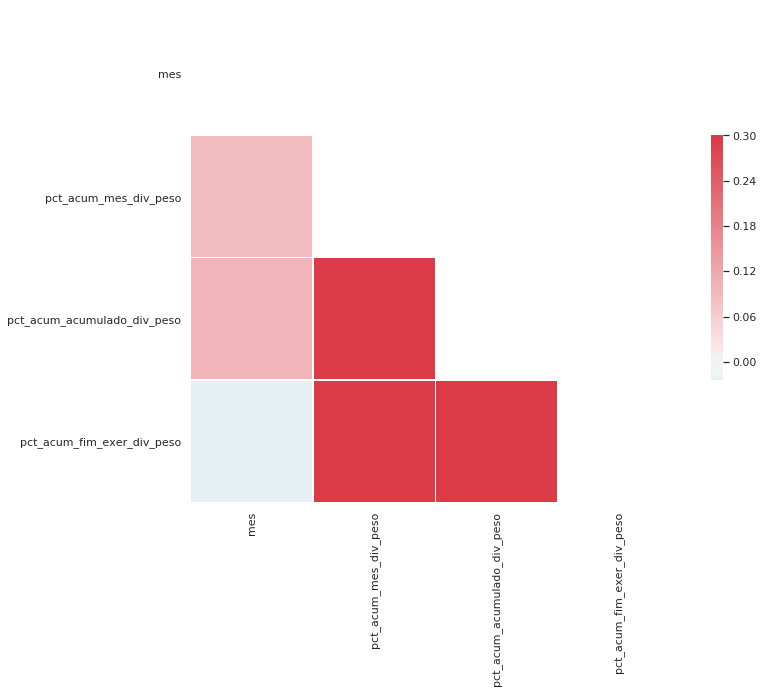

In [97]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white")


# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [98]:
x = data_notna.groupby('id_funcionario').mes.agg('nunique').reset_index()
func_todos_meses = x[x.mes > 9].id_funcionario
# func_todos_meses

In [99]:
d = data_notna.loc[(data_notna.nome_kpi == 3888) & (data_notna.id_funcionario.isin(func_todos_meses)),
               ['id_funcionario'] + cols2 + cols].astype(float).fillna(0)
d.to_csv('agoravai.csv')

In [100]:
# data_notna[data_notna.id_funcionario == 13].sort_values('id_funcionario')
d.pct_ating_mes.value_counts()

100.0    1123
0.0       716
80.0      122
90.0       94
Name: pct_ating_mes, dtype: int64

In [101]:
for col in d.columns:
    print(d[col].value_counts().head(5))

2878.0    12
5613.0    12
259.0     12
317.0     10
5384.0    10
Name: id_funcionario, dtype: int64
4.0     208
3.0     207
5.0     206
11.0    205
10.0    205
Name: mes, dtype: int64
0.000000    716
0.500000    341
0.200000    290
0.250000    212
0.333333    113
Name: pct_acum_mes_div_peso, dtype: int64
0.000000    849
0.500000    301
0.200000    273
0.250000    203
0.333333     92
Name: pct_acum_acumulado_div_peso, dtype: int64
0.500000    597
0.200000    386
0.250000    339
0.333333    162
0.571429     98
Name: pct_acum_fim_exer_div_peso, dtype: int64
100.0    1123
0.0       716
80.0      122
90.0       94
Name: pct_ating_mes, dtype: int64
100.0    1123
0.0       716
60.0      122
80.0       94
Name: pct_pts_mes, dtype: int64
20.0    1067
0.0      716
12.0     127
16.0      82
15.0      49
Name: pct_acum_mes, dtype: int64
100.0    1136
0.0       708
80.0      122
90.0       89
Name: pct_ating_acum, dtype: int64
100.0    1136
0.0       708
60.0      122
80.0       89
Name: pct_pts_ac

In [102]:
data_notna[(data_notna.nome_kpi == 3888)].regra_alcance_parcial.value_counts()

Regra de alcance parcial de acordo com Genius - Controle SDPO                                                                                                                                                                       11289
Regra de alcance parcial de acordo com Genius - Controle SDPO Parcial Alta H2 >= 62% na média dos Blocos do Pilar Trade relacionados Á  Função Parcial Baixa H2 >= 60% na média dos Blocos do Pilar Trade relacionados Á  Função       53
Name: regra_alcance_parcial, dtype: int64

In [103]:
for col in cols:
    print(data[data.status_meta.isna()][col].astype(float).value_counts())
    print('============')

Series([], Name: pct_ating_mes, dtype: int64)
100.0    23
0.0       2
80.0      1
Name: pct_pts_mes, dtype: int64
30.0    16
40.0     7
0.0      2
24.0     1
Name: pct_acum_mes, dtype: int64
Series([], Name: pct_ating_acum, dtype: int64)
100.0    11238
0.0       7774
80.0      2240
60.0      1433
Name: pct_pts_acumulado, dtype: int64
0.0     9982
20.0    5756
30.0    2830
40.0    1241
16.0    1101
24.0     931
25.0     803
15.0     782
12.0     737
32.0     317
18.0     227
10.0      70
9.0       64
35.0      22
28.0       7
8.0        4
Name: pct_acum_acumulado, dtype: int64
Series([], Name: pct_ating_fim_exer, dtype: int64)
100.0    15121
0.0       5281
80.0      1491
60.0       787
Name: pct_pts_fim_exer, dtype: int64
20.0    7659
0.0     7470
30.0    3555
40.0    1850
25.0    1115
15.0     926
16.0     768
12.0     470
24.0     455
32.0     265
18.0     120
10.0      86
9.0       75
35.0      24
28.0       4
8.0        3
6.0        2
21.0       1
Name: pct_acum_fim_exer, dtype: int

In [104]:
for col in cols:
    print(data[data.status_meta.notna()][col].astype(float).value_counts())
    print('============')

100.0    63841
0.0      29817
80.0      7132
90.0      5496
Name: pct_ating_mes, dtype: int64
100.0    63841
0.0      29817
60.0      7132
80.0      5496
Name: pct_pts_mes, dtype: int64
20.0    49794
0.0     29817
25.0     7578
15.0     7051
12.0     6288
16.0     4153
9.0       681
10.0      559
30.0      187
6.0        45
18.0       44
8.0        39
24.0       38
40.0        4
21.0        4
28.0        3
35.0        1
Name: pct_acum_mes, dtype: int64
100.0    64449
0.0      27791
80.0      8008
90.0      6465
Name: pct_ating_acum, dtype: int64
100.0    64449
0.0      27791
60.0      8008
80.0      6465
Name: pct_pts_acumulado, dtype: int64
20.0    45117
0.0     25283
25.0     6987
15.0     6384
12.0     6187
16.0     4331
9.0       662
10.0      487
30.0      172
6.0        60
18.0       47
8.0        30
24.0       24
40.0        4
21.0        3
28.0        2
Name: pct_acum_acumulado, dtype: int64
100.0    89711
0.0       6576
80.0      6094
90.0      4332
Name: pct_ating_fim_exer, d

In [105]:
# data[data.status_meta.isna() & (data.pct_ating_fim_exer.astype(float) > 90.) ]
for i in range(3,13):
    print(data[data.id_funcionario.isin(func_todos_meses) & (data.mes.astype(str) == str(i)) & (data.status_meta == 'Monitoramento Aprovado')].nome_kpi.value_counts().head(5))

3888    207
4580    181
2661     66
4729     57
4757     52
Name: nome_kpi, dtype: int64
3888    208
4580    180
2661     64
4729     57
4757     53
Name: nome_kpi, dtype: int64
3888    206
4580    179
2661     64
4729     57
4757     53
Name: nome_kpi, dtype: int64
3888    205
4580    178
2661     64
4729     57
4757     53
Name: nome_kpi, dtype: int64
3888    205
4580    177
2661     64
4729     56
4757     52
Name: nome_kpi, dtype: int64
3888    205
4580    177
2661     64
4729     57
4757     52
Name: nome_kpi, dtype: int64
3888    205
4580    177
3973     78
2661     65
4729     58
Name: nome_kpi, dtype: int64
3888    205
4580    178
3973     80
2661     65
4729     58
Name: nome_kpi, dtype: int64
3888    205
4580    178
3973     80
2661     65
4729     58
Name: nome_kpi, dtype: int64
3888    204
4580    177
3973     80
2661     65
4729     58
Name: nome_kpi, dtype: int64


In [106]:
data[(data.id_funcionario == func_todos_meses.iloc[8]) & (data.status_meta == 'Monitoramento Aprovado')].groupby('mes').nome_kpi.agg('unique')

mes
3     [4729, 3103, 4757]
4     [4729, 3103, 4757]
5     [4729, 3103, 4757]
6     [4729, 3103, 4757]
7     [4729, 3103, 4757]
8     [4729, 3103, 4757]
9     [4729, 3103, 4757]
10    [4729, 3103, 4757]
11    [4729, 3103, 4757]
12    [4729, 3103, 4757]
Name: nome_kpi, dtype: object

In [107]:
data[(data.id_funcionario == func_todos_meses.iloc[12]) & (data.status_meta == 'Monitoramento Aprovado')].groupby('mes').nome_kpi.agg('unique')

mes
3     [3414, 3851, 4741, 919, 3813]
4     [3414, 3851, 4741, 919, 3813]
5     [3414, 3851, 4741, 919, 3813]
6     [3414, 3851, 4741, 919, 3813]
7     [3414, 3851, 4741, 919, 3813]
8     [3414, 3851, 4741, 919, 3813]
9     [3414, 3851, 4741, 919, 3813]
10    [3414, 3851, 4741, 919, 3813]
11    [3414, 3851, 4741, 919, 3813]
12    [3414, 3851, 4741, 919, 3813]
Name: nome_kpi, dtype: object

In [108]:
data.loc[:,'nome_kpi':]

,nome_kpi,peso_kpi,prazo,regra_alcance_parcial,meta_projeto,pct_ating_mes,pct_pts_mes,pct_acum_mes,pct_ating_acum,pct_pts_acumulado,...,status_meta,count,mes_entrada,total_meses,mes_entrou,mes_saiu,soma_peso,pct_acum_mes_div_peso,pct_acum_acumulado_div_peso,pct_acum_fim_exer_div_peso
0,4729,25,12/31/2017 12:00:00 AM,"PA1: 99,5% da meta PA2: 99,0% da meta",Não,0,0,0,0,0,...,Monitoramento Aprovado,5,3,0,False,False,100,0.00,0.00,0.2500
1,3138,20,12/31/2017 12:00:00 AM,80% pontos: -10pp vs Bgt,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,5,3,0,False,False,100,NaN,NaN,NaN
2,3103,20,12/31/2017 12:00:00 AM,PA1: 80% = 80% pts PA2: 60% = 60% pts,Não,80,60,12,80,60,...,Monitoramento Aprovado,5,3,0,False,False,100,0.12,0.12,0.2000
3,4757,15,12/31/2017 12:00:00 AM,PA1: 95%_x000D_ PA2: 90%,Não,100,100,15,90,80,...,Monitoramento Aprovado,5,3,0,False,False,100,0.15,0.12,0.1500
4,4762,20,12/31/2017 12:00:00 AM,"80% pontos: 97,5% da meta",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,5,3,0,False,False,100,NaN,NaN,NaN
5,3696,15,12/31/2017 12:00:00 AM,Regra da Lacuna: Lacuna = (Real - Real AA)/(Me...,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,5,3,0,False,False,100,NaN,NaN,NaN
6,2424,20,12/31/2017 12:00:00 AM,100%: LTI (area) = 0 e LTI Fab <= Bgt e TRI (a...,Não,100,100,20,100,100,...,Monitoramento Aprovado,5,3,0,False,False,100,0.20,0.20,0.2000
7,1890,20,12/31/2017 12:00:00 AM,100% GLY Area + GLY Linha,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,5,3,0,False,False,100,NaN,NaN,NaN
8,4580,20,12/31/2017 12:00:00 AM,Conforme Matriz de Metas VPO 2017 disponível n...,Não,100,100,20,100,100,...,Monitoramento Aprovado,5,3,0,False,False,100,0.20,0.20,0.2000
9,451,25,12/31/2017 12:00:00 AM,"100% meta atingida em aço e PVC , 60% meta ati...",Não,0,0,0,0,0,...,Monitoramento Aprovado,5,3,0,False,False,100,0.00,0.00,0.2500


In [109]:
data.groupby(['status_meta', 'pct_pts_acumulado']).fillna('-100').size()

TypeError: 'numpy.int64' object is not callable

In [ ]:
data[['status_meta', 'pct_pts_acumulado']].fillna(-100).groupby(['status_meta', 'pct_pts_acumulado']).size()